# CNN (Convolutional Neural Network) avec *tf.keras*

Dans ce notebook, nous allons créer des réseaux de neurones pour classifier les images du jeu de données [CIFAR10 small image classification](https://keras.io/datasets/)

**Objectif : classifier des images CIFAR10**
- Import et Vérification des versions des librairies
- Chargement du jeu de données CIFAR10
- Pré-processing
- Construction d'un modèle Fully Connected
- Construction d'un modèle CNN
- Prédiction
- Visualisation des prédictions

## ◢ 1 Import & Vérification des versions des librairies

In [1]:
import tensorflow as tf
from tensorflow import keras  # tf.keras
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## ◢ 2 Chargement du jeu de données CIFAR10 small image classification

Keras permet de charger de nombreux datasets avec `keras.datasets`.
Nous utiliserons le jeu de données CIFAR10 small image classification, qui est une base de données de 60000 images regroupant 10 catégories d'images ("avion","voiture", "oiseau","chat","cerf","chien","grenouille","cheval","bateau","camion").

Elle regroupe 50000 images d'apprentissage et 10000 images de test
Ces images sont en couleur et de 32 pixels de côté.

In [2]:
classes = [
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion"
]

Chargez le jeu de données en utilisant `keras.datasets.cifar10.load_data()`
Séparez le en :
- un jeu d'entrainement de 45000 images
- un jeu de validation de 5000 images
- un jeu de test de 10000 images

In [3]:
from tensorflow.keras.datasets import cifar10

# Charger le jeu de données
cifar10 = cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

X_valid, X_train = X_train_full[45000:50000], X_train_full[:45000]
y_valid, y_train = y_train_full[45000:50000], y_train_full[:45000]

# Afficher les dimensions des jeux de données
print("Dimensions du jeu d'entraînement :", X_train.shape)
print("Dimensions du jeu de validation :", X_valid.shape)
print("Dimensions du jeu de test :", X_test.shape)


170498071/170498071 [==============================] - 6s 0us/step
Dimensions du jeu d'entraînement : (45000, 32, 32, 3)
Dimensions du jeu de validation : (5000, 32, 32, 3)
Dimensions du jeu de test : (10000, 32, 32, 3)


## ◢ 3 Pré-Processing
Réduisez les valeurs des pixels entre 0 et 1.

In [4]:
# Normaliser les valeurs des pixels entre 0 et 1
X_train_normalized = X_train / 255.0
X_valid_normalized = X_valid / 255.0
X_test_normalized = X_test / 255.0

Affichez quelques images en utilisant la fonction de la librairie matplot `plt.imshow()` et affichez la classe.

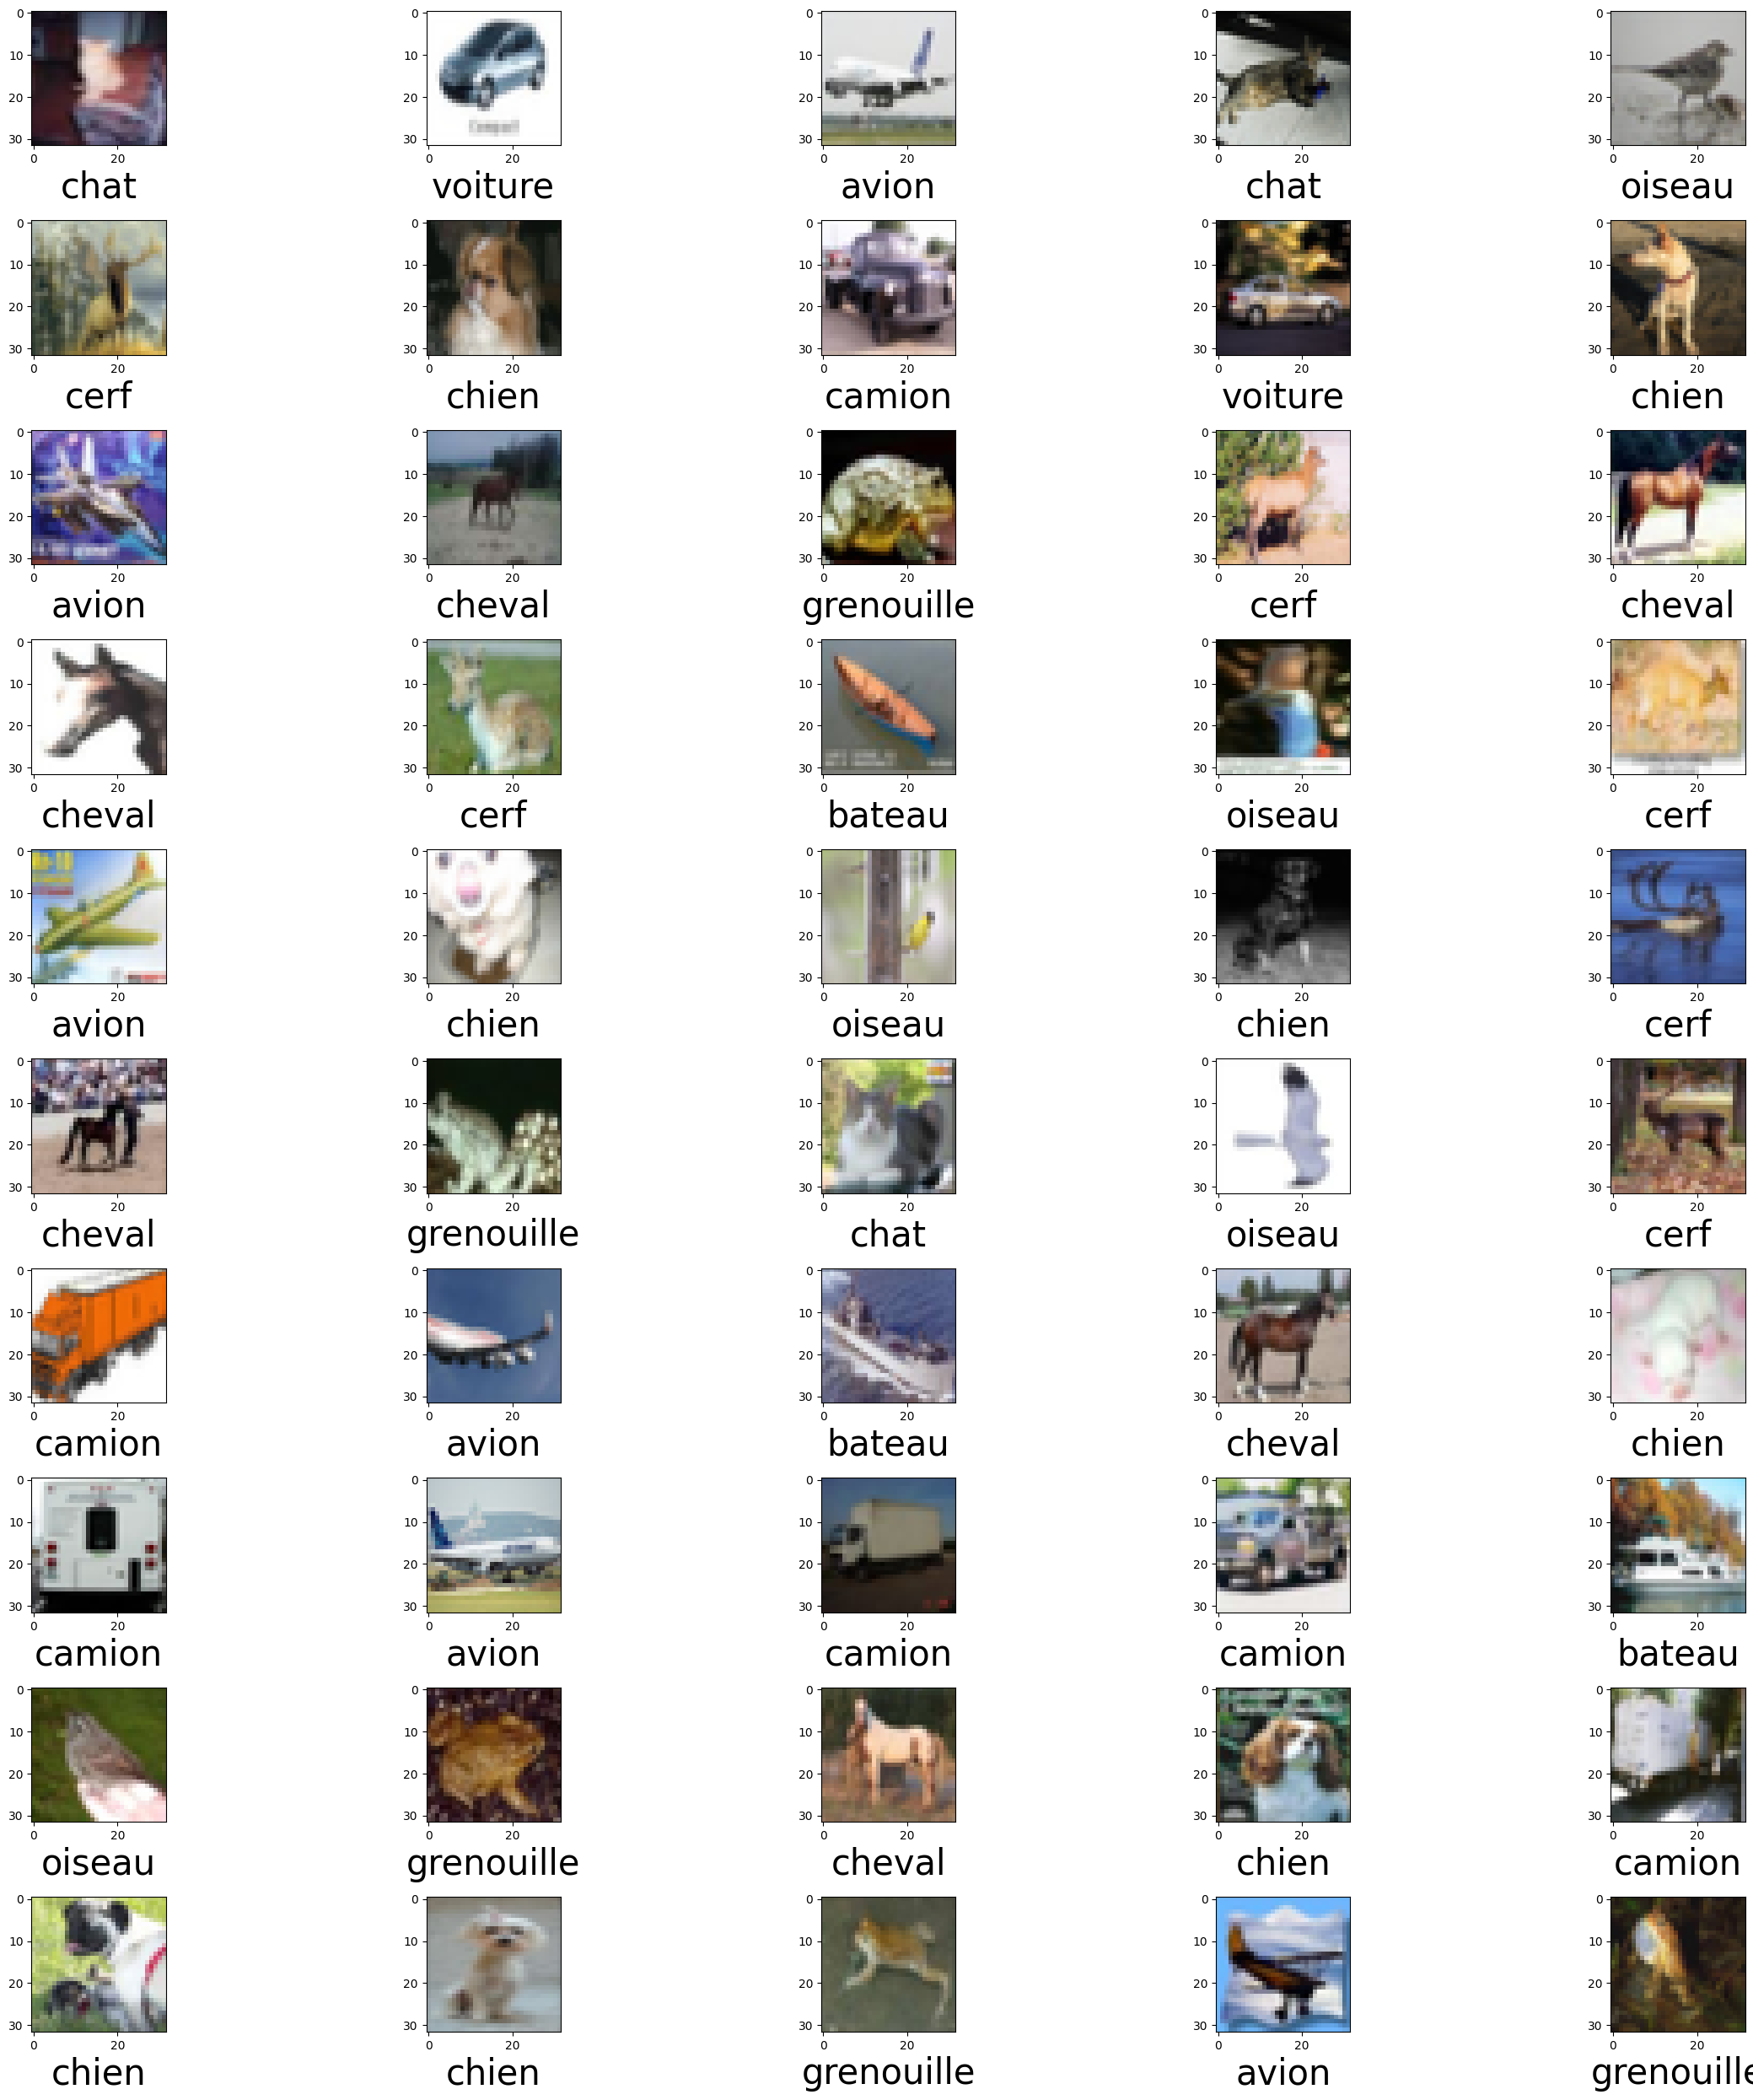

In [5]:
plt.figure(figsize=(25, 25))
n_rows, n_cols = 10, 5
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(X_train[i])
        plt.xlabel(classes[y_train[i][0]], fontsize=30)
plt.tight_layout()
plt.show()

## ◢ 4 Construction d'un modèle Fully Connected

Construction d'un modèle avec l'API `keras.models.Sequential`, sans aucun argument, et avec 4 couches:
  * Une couche `Flatten` (`keras.layers.Flatten`) pour convertir chaque image de taille 32x32x3 image en un simple tableau de 3072 pixels. Comme cette couche est la première de votre modèle, vous devez spécifier l'argument `input_shape`.
  * Une couche cachée `Dense` (`keras.layers.Dense`) avec 128 neurones (également appelés units), et la fonction d'activation `"relu"`.
  * Une couche cachée `Dense` (`keras.layers.Dense`) avec 64 neurones (également appelés units), et la fonction d'activation `"relu"`.
  * Pour finir une couche `Dense` avec 10 neurones (1 par classe), et avec la fonction d'activation `"softmax"` pour s'assurer que la somme de toutes les probabilités des classes estimées pour chaque image est égale à 1.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# Construction du modèle
model = keras.models.Sequential([

    # Couche Flatten pour convertir chaque image en tableau de 3072 pixels
    layers.Flatten(input_shape=(32, 32, 3)),

    # Première couche cachée Dense avec 128 neurones et activation "relu"
    layers.Dense(128, activation='relu'),

    # Deuxième couche cachée Dense avec 64 neurones et activation "relu"
    layers.Dense(64, activation='relu'),

    # Couche de sortie Dense avec 10 neurones et activation "softmax"
    layers.Dense(10, activation='softmax')
])

# Afficher la structure du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilez le modèle en utilisant :
- la fonction loss `sparse_categorical_crossentropy`
- l'optimizer `keras.optimizers.SGD` avec un `learning rate` à 0.1
- la métrique `accuracy`

In [7]:
# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.1),
              metrics=['accuracy'])


Entrainez le modèle avec 20 epochs.
Utilisez les données de validation

In [8]:
# Entraîner le modèle avec 20 epochs et utiliser les données de validation
history = model.fit(X_train_normalized, y_train, epochs=20, validation_data=(X_valid_normalized, y_valid))


Epoch 1/20
1407/1407 [==============================] - 10s 4ms/step - loss: 1.9568 - accuracy: 0.2795 - val_loss: 2.1156 - val_accuracy: 0.2620
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8017 - accuracy: 0.3475 - val_loss: 1.8198 - val_accuracy: 0.3144
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7406 - accuracy: 0.3746 - val_loss: 1.8884 - val_accuracy: 0.3242
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6952 - accuracy: 0.3905 - val_loss: 1.7975 - val_accuracy: 0.3550
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6659 - accuracy: 0.4013 - val_loss: 2.2506 - val_accuracy: 0.2384
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6442 - accuracy: 0.4117 - val_loss: 1.8435 - val_accuracy: 0.3418
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6204 - accuracy: 0.4168 - val_loss: 1.6998 - val_accuracy

Affichez le graphe d'apprentissage du modèle

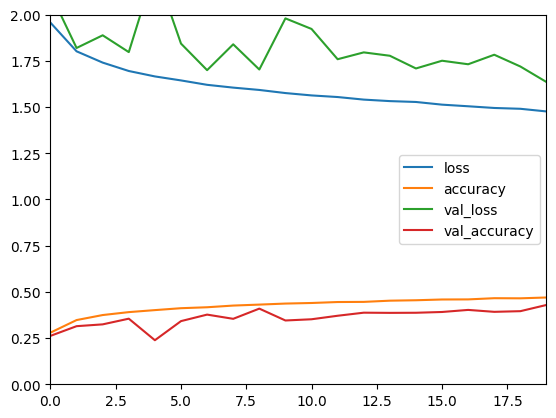

In [9]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()

Nous voyons sur cette courbe que le modèle atteint une accuracy d'environ 40% et que l'accuracy sur le jeu de validation a tendance à osciller (manque de généralisation du modèle).

Avant d'essayer de construire un modèle avec une architecture CNN, appelons la méthode `summary()` sur le modèle afin de noter le nombre de paramètres entrainables.

In [10]:
# Afficher le résumé du modèle pour obtenir le nombre de paramètres entraînables
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ◢ 5 Construction d'un modèle CNN

Construction d'un modèle CNN avec l'API `keras.models.Sequential`:
- **la phase de feature learning** : Construisons 2 blocs VGG (un bloc VGG étant conv2D >> conv2D >> MaxPool2D) :
    - 1er bloc VGG : `Conv2D(filters=64) >> Conv2D(filters=64) >> MaxPool2D (pool_size=2)`
    - 2ème bloc VGG : `Conv2D(filters=128) >> Conv2D(filters=128) >> MaxPool2D (pool_size=2)` <br>
Pour chaque couche `Conv2D`, la `taille du kernel` est de `4`, le `padding` est à `valid` et la `fonction d'activation` est `relu`
- **la phase de classification**  : `Flatten >> Dense (1024 units + relu) >> Dense (10 units + softmax)`

Compilez le modèle en utilisant :
- la fonction loss `sparse_categorical_crossentropy`
- l'optimizer `adam`
- la métrique `accuracy`

Entrainez le modèle avec 30 epochs. Utilisez les données de validation

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Construction du modèle CNN
model = Sequential([
    # Phase de feature learning - 1er bloc VGG
    Conv2D(filters=64, kernel_size=4, padding='valid', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=4, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=2),

    # Phase de feature learning - 2ème bloc VGG
    Conv2D(filters=128, kernel_size=4, padding='valid', activation='relu'),
    Conv2D(filters=128, kernel_size=4, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=2),

    # Phase de classification
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Afficher le résumé du modèle pour obtenir le nombre de paramètres entraînables
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 128)       131200    
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         262272    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                 

In [15]:
# Entraîner le modèle avec 30 epochs et utiliser les données de validation
history = model.fit(X_train_normalized, y_train, epochs=30, validation_data=(X_valid_normalized, y_valid))

Epoch 1/30
1407/1407 [==============================] - 13s 8ms/step - loss: 1.5968 - accuracy: 0.4125 - val_loss: 1.2892 - val_accuracy: 0.5298
Epoch 2/30
1407/1407 [==============================] - 11s 8ms/step - loss: 1.1921 - accuracy: 0.5736 - val_loss: 1.0605 - val_accuracy: 0.6262
Epoch 3/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.9938 - accuracy: 0.6479 - val_loss: 0.9689 - val_accuracy: 0.6564
Epoch 4/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8646 - accuracy: 0.6959 - val_loss: 0.9519 - val_accuracy: 0.6712
Epoch 5/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7612 - accuracy: 0.7326 - val_loss: 0.9048 - val_accuracy: 0.6928
Epoch 6/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6593 - accuracy: 0.7688 - val_loss: 0.9437 - val_accuracy: 0.6990
Epoch 7/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.5624 - accuracy: 0.8012 - val_loss: 0.9566 - val_ac

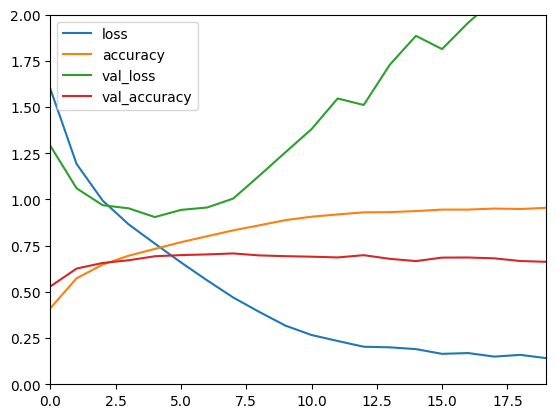

In [16]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 2])
plt.show()

Nous notons que le modèle est instable et a tendance à overfiter. Pour celà, que diriez-vous de modifier le learning rate (essayez 0.005 et 0.0005).

Si cela ne suffit pas, rajoutez une couche de dropout de 0.4 juste après chaque bloc VGG.

In [37]:
# Compiler le modèle avec différents learning rates
learning_rates = [0.005, 0.0005]
for lr in learning_rates:
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  metrics=['accuracy'])

    # Afficher le résumé du modèle pour obtenir le nombre de paramètres entraînables
    model.summary()

    # Entraîner le modèle avec 30 epochs et utiliser les données de validation
    history = model.fit(X_train_normalized, y_train, epochs=30, validation_data=(X_valid_normalized, y_valid))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 128)       131200    
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         262272    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                 

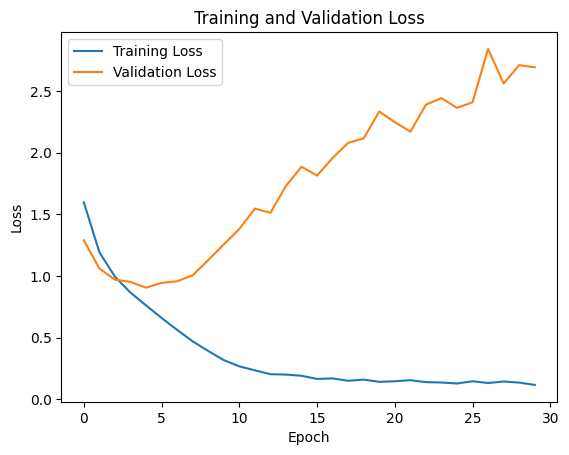

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Que remarquez-vous lors de l'entrainement du modèle ?

Appelez la méthode `summary()` sur le modèle

In [18]:
# Afficher la structure du modèle

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 128)       131200    
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         262272    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                 

Comparez le nombre de paramètres entre le réseau fully connected et le CNN

## ◢  6 Prédiction
Appelez la méthode `predict()` sur le modèle afin d'estimer la probabilité de chaque classe pour chaque instance (pour une meilleure lisibilité, utilisez la méthode `round()` sur les probabilités générées):

In [19]:
# Estimer la probabilité de chaque classe pour les dix premières instances du jeu de test
y_proba = model.predict(X_test[:10])

# Arrondir les probabilités pour une meilleure lisibilité
y_proba_rounded = y_proba.round(3)

# Afficher les probabilités arrondies
print(y_proba_rounded)

1/1 [==============================] - 0s 270ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


A partir des probabilités des différentes valeurs, déduisons-en la valeur prédite (celle qui a le % maximum => utilisez la fonction `argmax`)

In [20]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([0, 1, 1, 0, 4, 6, 1, 6, 7, 1])

## ◢ 7 Visualisation des prédictions

Méthodes utilitaires pour afficher une image et un bar chart représentant la probabilité des prédictions pour chaque chiffre de 0 à 9 (les prédictions en bleu sont les prédictions correctes et en rouge celles incorrectes)

In [21]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Objet prédit {} {:2.0f}% ({})".format(classes[predicted_label],
                                                        np.max(predictions_array) *100,
                                                        classes[true_label[0]]),
                                                        color=color)

def plot_prediction_bar_chart(predictions_array, true_label, img):
    thisplot = plt.bar(classes, predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')
    plt.xticks(classes, rotation=90)

Affichage de l'image à prédire et de la probabilité des prédictions pour chaque chiffre de 0 à 9 pour la première image

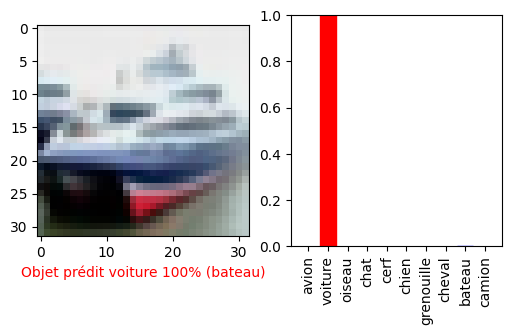

In [22]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i], X_test[i])
plt.show()

### 7-1 Affichons les 15 premières images et visualisons les prédictions

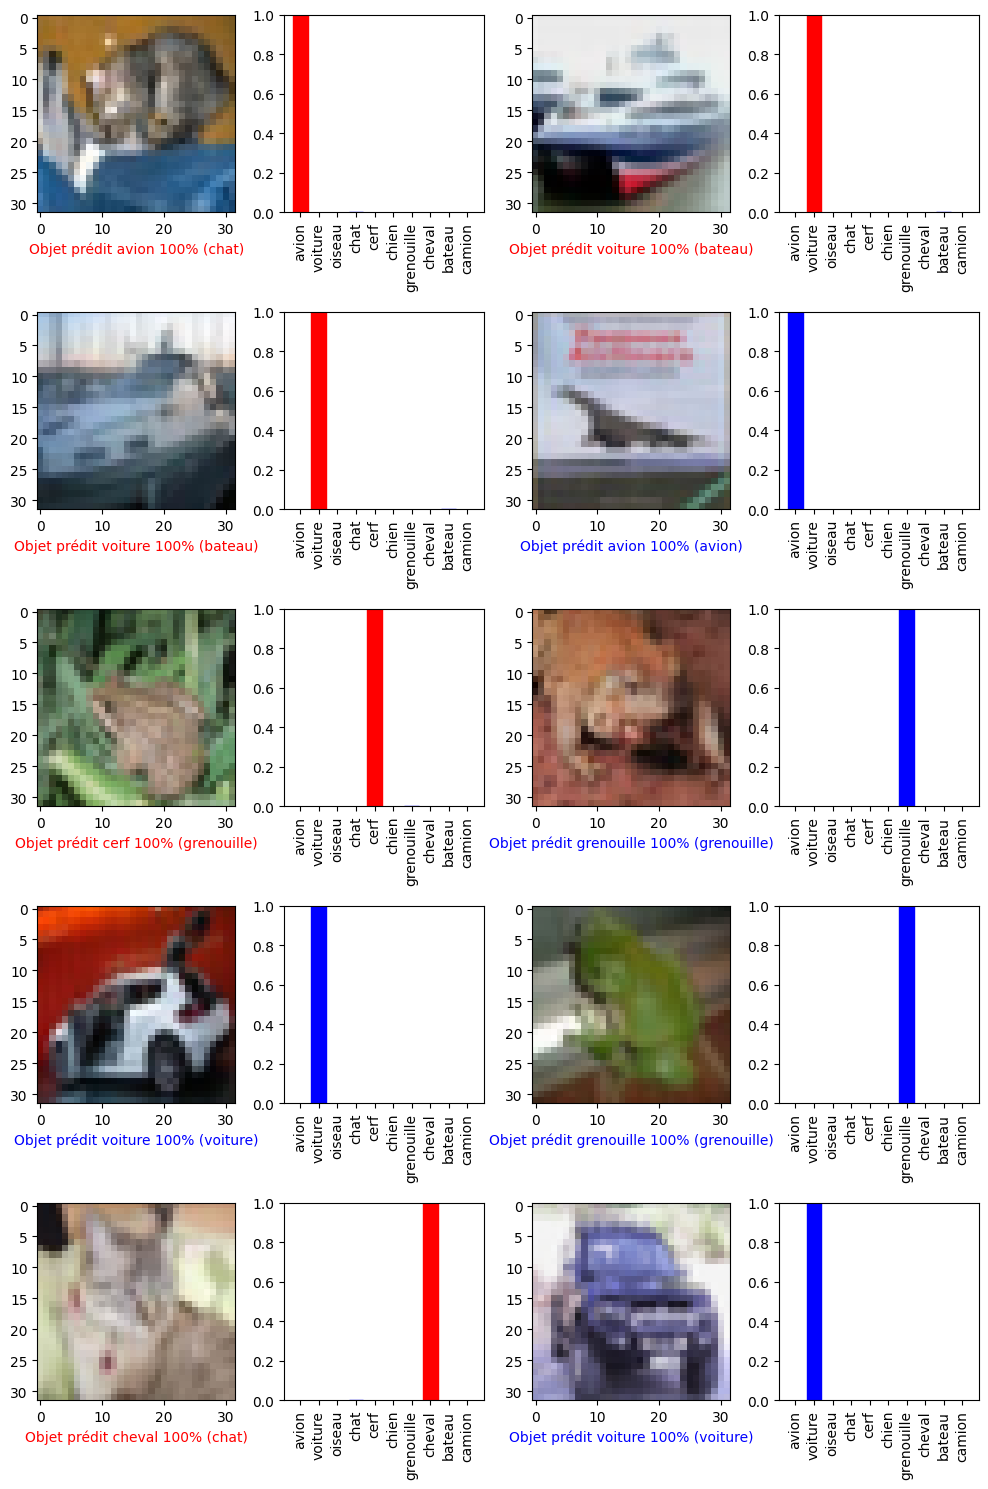

In [26]:
# Determine the number of rows and columns based on the size of the dataset
num_rows = min(5, len(X_test) // 2)  # Ensure an even number of subplots for each image
num_cols = 2

# Set up the plot figure
plt.figure(figsize=(5 * num_cols, 3 * num_rows))

# Loop through the images
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col

        # Check if the index is within the size of the dataset
        if index < len(X_test):
            # Plot the image with predictions
            plt.subplot(num_rows, 2 * num_cols, 2 * index + 1)
            plot_prediction_image(y_proba[index], y_test[index], X_test[index])

            # Plot the bar chart with predictions
            plt.subplot(num_rows, 2 * num_cols, 2 * index + 2)
            plot_prediction_bar_chart(y_proba[index], y_test[index], X_test[index])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### 7-2 Focus sur les images mal prédites

In [27]:
y_test2 = y_test.reshape((1,-1))[0]

In [33]:
y_proba_false = y_proba[y_pred != y_test2]
y_test_false = y_test[y_pred != y_test2]
X_test_false = X_test[y_pred != y_test2]

print(y_proba_false.shape)
print(y_test_false.shape)
print(X_test_false.shape)

(1, 10, 10)
(1, 10000, 1)
(1, 10000, 32, 32, 3)


<ipython-input-33-ed4c01e2eac0>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_proba_false = y_proba[y_pred != y_test2]
<ipython-input-33-ed4c01e2eac0>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_test_false = y_test[y_pred != y_test2]
<ipython-input-33-ed4c01e2eac0>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  X_test_false = X_test[y_pred != y_test2]


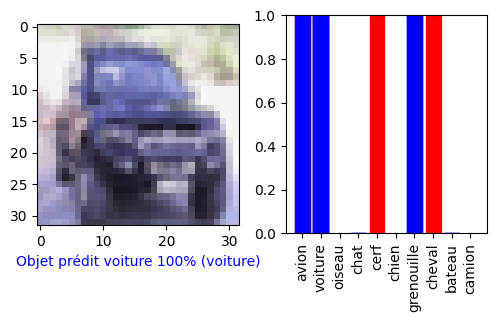

In [35]:
num_rows = 5
num_cols = 3

plt.figure(figsize=(5 * num_cols, 3 * num_rows))

for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col

        if index < len(X_test_false):
            plt.subplot(num_rows, 2 * num_cols, 2 * index + 1)

            # Assuming plot_prediction_image handles multiple images
            for img_index in range(min(len(X_test_false[index]), 10)):  # Limit to 10 images for display
                plot_prediction_image(y_proba_false[index, img_index], y_test_false[index, img_index], X_test_false[index, img_index])

            plt.subplot(num_rows, 2 * num_cols, 2 * index + 2)

            # Assuming plot_prediction_bar_chart handles multiple images
            for img_index in range(min(len(X_test_false[index]), 10)):  # Limit to 10 images for display
                plot_prediction_bar_chart(y_proba_false[index, img_index], y_test_false[index, img_index], X_test_false[index, img_index])

plt.tight_layout()
plt.show()
